<a href="https://colab.research.google.com/github/atifahnabilla/Freshcan-MachineLearning/blob/master/Train_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense, Dropout
from tensorflow.keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator

In [6]:
# Import Kaggle.json to make access to download kaggle dataset
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [7]:

!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:

# Find kaggle.json
!find /.kaggle -name "kaggle.json"

/.kaggle/kaggle.json


In [9]:

# Download dataset
!kaggle datasets download -d indragenn/fruit-dataset-for-classification

 86% 97.0M/113M [00:01<00:00, 58.6MB/s]
100% 113M/113M [00:01<00:00, 67.4MB/s] 


In [11]:
# Unzip the file
import zipfile
local_datazip = '/content/fruit-dataset-for-classification.zip'
zip_buka = zipfile.ZipFile(local_datazip, 'r')
zip_buka.extractall('/content')
zip_buka.close()

In [12]:
# Providing TRAIN and TEST path as well as the size of image
TRAIN_PATH = '/content/Dataset/Train'
TEST_PATH = '/content/Dataset/Test'
SIZE = (150, 150)

In [13]:
#Collect the label based on name of the folders
labels = []
for label in os.listdir(TRAIN_PATH):
  labels.append(label)

NUM_LABELS = len(labels)
print(NUM_LABELS)
print(labels)

10
['Fresh_Mango', 'Fresh_Guava', 'Fresh_Strawberry', 'Rotten_Mango', 'Rotten_Strawberry', 'Rotten_Lemon', 'Rotten_Lime', 'Rotten Guava', 'Fresh_Lemon', 'Fresh_Lime']


In [18]:
# Normalisasi dan augmentasi

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dataset = train_datagen.flow_from_directory(
                                          TRAIN_PATH,
                                          batch_size = 32,
                                          shuffle = True,
                                          classes = labels,
                                          target_size = SIZE,
                                          class_mode = 'categorical')

test_dataset = test_datagen.flow_from_directory(TEST_PATH,
                                                  batch_size=1,
                                                  target_size=SIZE,
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')

Found 9460 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


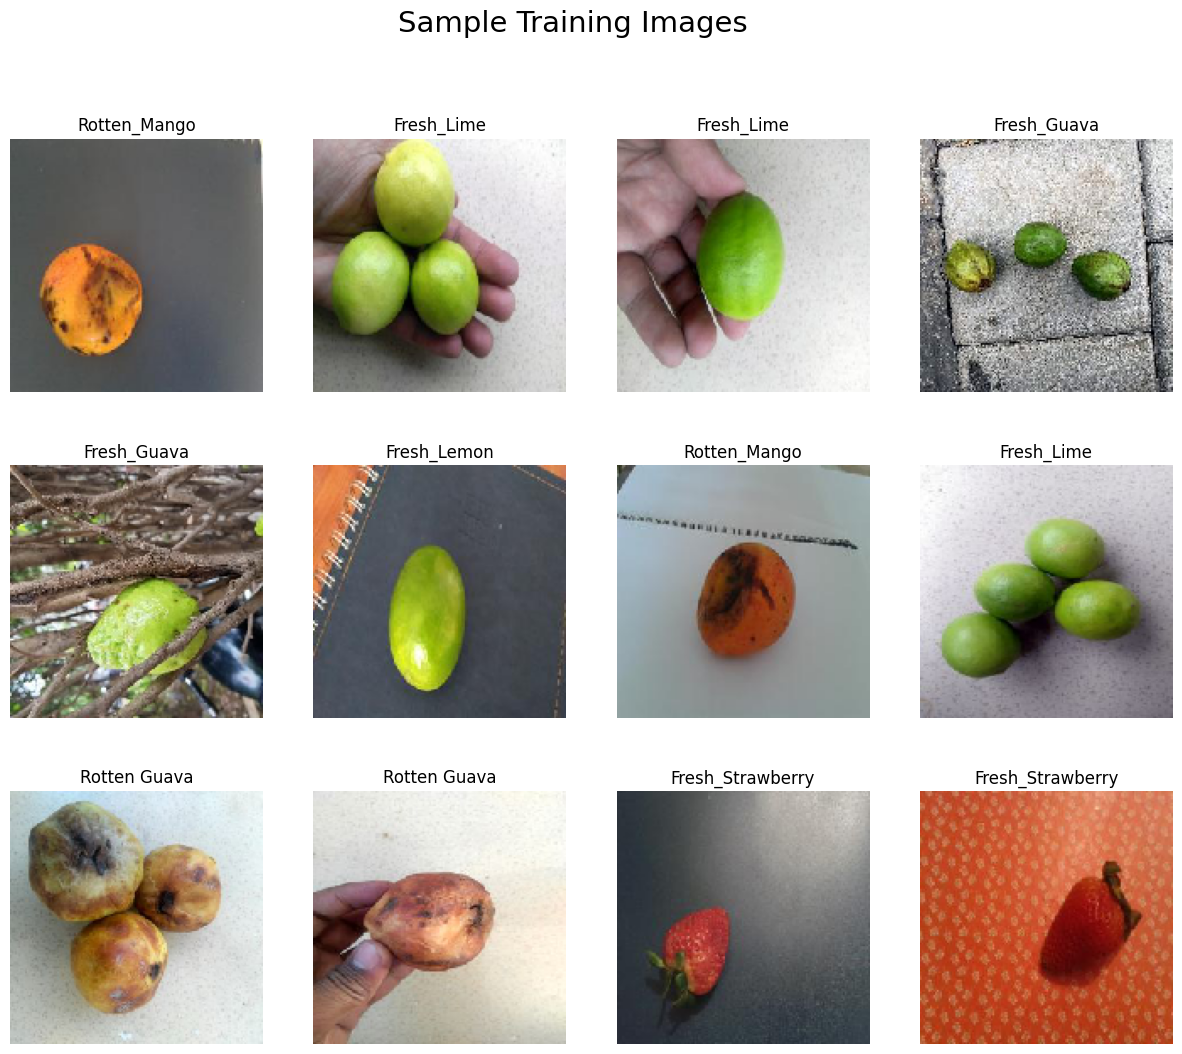

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [20]:
# Build Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
    

In [22]:

# Model Compile
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(train_dataset, validation_data=test_dataset, epochs=5)

Epoch 1/5
296/296 [==============================] - 312s 1s/step - loss: 0.8022 - accuracy: 0.7114 - val_loss: 0.4380 - val_accuracy: 0.8550
Epoch 2/5
296/296 [==============================] - 288s 974ms/step - loss: 0.1894 - accuracy: 0.9405 - val_loss: 0.3501 - val_accuracy: 0.9030
Epoch 3/5
296/296 [==============================] - 295s 998ms/step - loss: 0.0832 - accuracy: 0.9723 - val_loss: 0.2465 - val_accuracy: 0.9190
Epoch 4/5
296/296 [==============================] - 294s 991ms/step - loss: 0.0926 - accuracy: 0.9714 - val_loss: 0.2692 - val_accuracy: 0.9250
Epoch 5/5
296/296 [==============================] - 298s 1s/step - loss: 0.0506 - accuracy: 0.9841 - val_loss: 0.2574 - val_accuracy: 0.9310


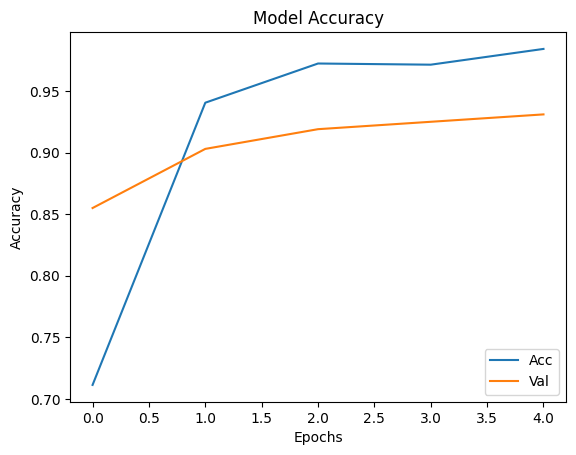

In [23]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

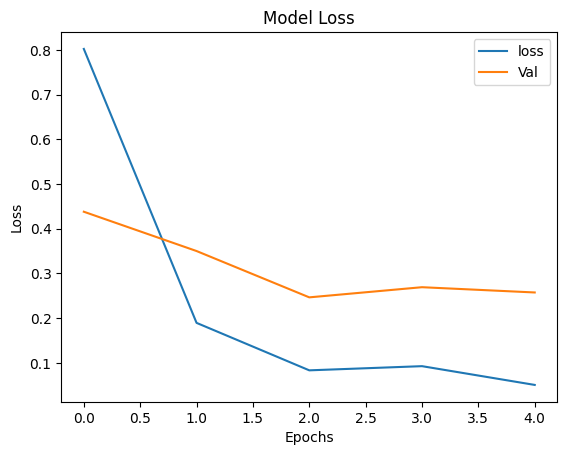

In [24]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')